<h4><b>Machine Learing Project</b></h4>
<h4><b>Author : THAMBUGALA ATHUKORALALAGE JAYANI SANDUNKA ATHUKORALA</b></h4>

In [1]:
# This "project_file1.ipynb" file contains visualization of dataset, defining, eveluating and traing CNN, LSTM, KNN models

<h3>Importing required Libraries</h3>

In [2]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from time import time
import seaborn as sns #seaborn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

2023-06-11 07:11:20.537415: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 07:11:20.698618: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


<h3>Exploring the dataset</h3>

In [3]:
# Load FER2013 dataset
data = pd.read_csv('dataset/fer2013.csv')

<h3>Data summary</h3>

In [4]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
# Unique category labels 
label_map={0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprised', 6: 'Neutral'}
data.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [6]:
# Unique category counts
data.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

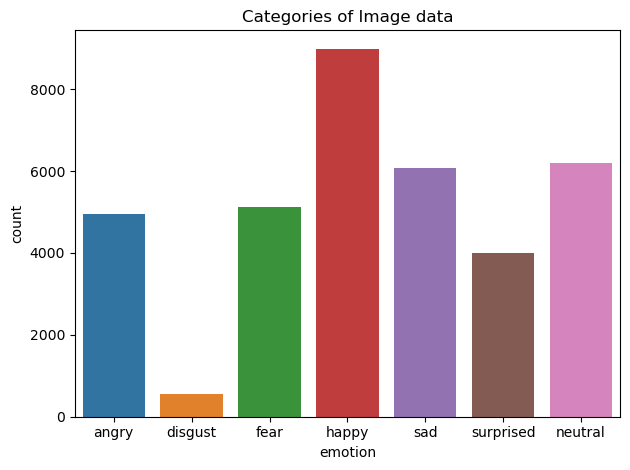

In [7]:
# Graphical illustration of data
ax = sns.countplot(x=data.emotion)
ax.set(xticklabels = (['angry', 'disgust', 'fear', 'happy', 'sad', 'surprised', 'neutral']))
plt.title('Categories of Image data')
plt.tight_layout()
plt.show()

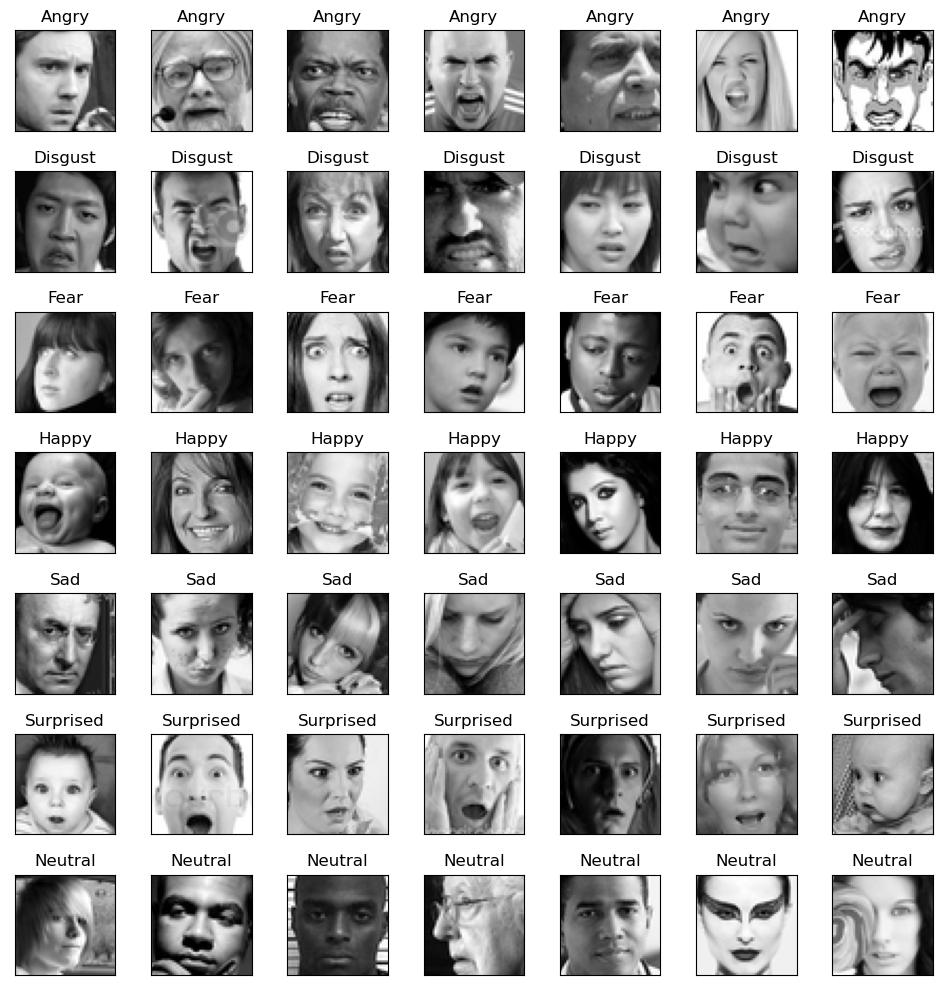

In [8]:
# Visualization of sample of image data
fig = plt.figure(1, (10, 10))

k = 0
for label in sorted(data.emotion.unique()):
    for j in range(7):
        px = data[data.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')

        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_map[label])
        plt.tight_layout()

<h3>Preprocess data</h3>

In [9]:
# Preprocess the data
X = []
y = []
for i, row in data.iterrows():
    pixels = np.array(row['pixels'].split(' '), dtype=int)
    X.append(pixels)
    y.append(row['emotion'])
X = np.array(X) / 255.0
y = np.array(y)

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [11]:
# Reshape input data for CNN model
X_train_cnn = X_train.reshape(-1, 48, 48, 1)
X_test_cnn = X_test.reshape(-1, 48, 48, 1)

X_train_cnn.shape, X_test_cnn.shape, y_train.shape, y_test.shape

((32298, 48, 48, 1), (3589, 48, 48, 1), (32298,), (3589,))

In [12]:
# Reshape input data for LSTM model
X_train_lstm = pad_sequences(X_train.reshape(-1, 48, 48), maxlen=48, padding='post')
X_test_lstm = pad_sequences(X_test.reshape(-1, 48, 48), maxlen=48, padding='post')

X_train_lstm.shape, X_test_lstm.shape, y_train.shape, y_test.shape

((32298, 48, 48), (3589, 48, 48), (32298,), (3589,))

In [13]:
# Normalize data for KNN model
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train)
X_test_knn = scaler.transform(X_test)

X_train_knn.shape, X_test_knn.shape, y_train.shape, y_test.shape

((32298, 2304), (3589, 2304), (32298,), (3589,))

In [14]:
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']

<h3>Define models</h3>

<h4><b>CNN Model</b></h4>

In [15]:
width, height = 48, 48
# CNN model
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

2023-06-11 07:12:02.679528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h4><b>LSTM Model</b></h4>

In [16]:
# LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(48, 48)),
    LSTM(64),
    Dense(7, activation='softmax')
])

<h4><b>KNN Model</b></h4>

In [17]:
# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

<h3>Train models</h3>

<h4><b>CNN Model</b></h4>

In [18]:
# Train CNN model
start_time = time()
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=64, verbose=1)
cnn_training_time = time() - start_time

# Predict the emotions for test data
start_time = time()
cnn_predictions = cnn_model.predict(X_test_cnn)
cnn_predictions = np.argmax(cnn_predictions, axis=1)
cnn_pred_time = time() - start_time

Epoch 1/50
505/505 [==============================] - 42s 81ms/step - loss: 1.5970 - accuracy: 0.3771
Epoch 2/50
505/505 [==============================] - 41s 81ms/step - loss: 1.3871 - accuracy: 0.4692
Epoch 3/50
505/505 [==============================] - 41s 81ms/step - loss: 1.2957 - accuracy: 0.5059
Epoch 4/50
505/505 [==============================] - 41s 81ms/step - loss: 1.2256 - accuracy: 0.5368
Epoch 5/50
505/505 [==============================] - 41s 80ms/step - loss: 1.1605 - accuracy: 0.5636
Epoch 6/50
505/505 [==============================] - 39s 78ms/step - loss: 1.0999 - accuracy: 0.5873
Epoch 7/50
505/505 [==============================] - 39s 78ms/step - loss: 1.0407 - accuracy: 0.6134
Epoch 8/50
505/505 [==============================] - 39s 76ms/step - loss: 0.9837 - accuracy: 0.6323
Epoch 9/50
505/505 [==============================] - 39s 76ms/step - loss: 0.9229 - accuracy: 0.6578
Epoch 10/50
505/505 [==============================] - 39s 77ms/step - loss: 0.869

<h4><b>LSTM Model</b></h4>

In [19]:
# Train LSTM model
start_time = time()
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=64, verbose=1)
lstm_training_time = time() - start_time

# Predict the emotions for test data
start_time = time()
lstm_predictions = np.argmax(lstm_model.predict(X_test_lstm), axis=-1)
lstm_pred_time = time() - start_time

Epoch 1/50
505/505 [==============================] - 55s 100ms/step - loss: 1.8018 - accuracy: 0.2576
Epoch 2/50
505/505 [==============================] - 51s 100ms/step - loss: 1.7921 - accuracy: 0.2604
Epoch 3/50
505/505 [==============================] - 51s 100ms/step - loss: 1.7881 - accuracy: 0.2617
Epoch 4/50
505/505 [==============================] - 51s 100ms/step - loss: 1.7865 - accuracy: 0.2629
Epoch 5/50
505/505 [==============================] - 51s 101ms/step - loss: 1.7821 - accuracy: 0.2651
Epoch 6/50
505/505 [==============================] - 51s 100ms/step - loss: 1.7786 - accuracy: 0.2661
Epoch 7/50
505/505 [==============================] - 50s 100ms/step - loss: 1.7753 - accuracy: 0.2683
Epoch 8/50
505/505 [==============================] - 51s 100ms/step - loss: 1.7717 - accuracy: 0.2698
Epoch 9/50
505/505 [==============================] - 50s 100ms/step - loss: 1.7681 - accuracy: 0.2731
Epoch 10/50
505/505 [==============================] - 51s 101ms/step - l

<h4><b>KNN Model</b></h4>

In [20]:
# Train KNN model
start_time = time()
knn_model.fit(X_train_knn, y_train)
knn_training_time = time() - start_time

# Predict the emotions for test data
start_time = time()
knn_predictions = knn_model.predict(X_test_knn)
knn_pred_time = time() - start_time

<h3>Evaluate models</h3>

<h4><b>CNN Model</b></h4>

In [21]:
# Confusion matrics report
print(classification_report(y_test, cnn_predictions, labels=[0,1,2,3,4,5,6], target_names=labels))

              precision    recall  f1-score   support

       Angry       0.40      0.38      0.39       498
     Disgust       0.52      0.44      0.48        52
        Fear       0.41      0.37      0.39       545
       Happy       0.69      0.73      0.71       881
         Sad       0.40      0.40      0.40       588
   Surprised       0.70      0.60      0.65       414
     Neutral       0.44      0.50      0.47       611

    accuracy                           0.51      3589
   macro avg       0.51      0.49      0.50      3589
weighted avg       0.51      0.51      0.51      3589



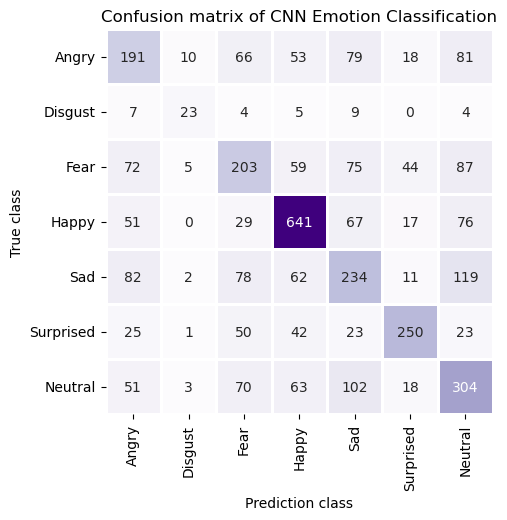

In [22]:
# CNN Confusion matrix
cnn_cm = confusion_matrix(y_test, cnn_predictions)
#Transform to df for easier plotting
cnn_cm_df = pd.DataFrame(cnn_cm, index = labels, columns = labels)

plt.figure(figsize = (5,5))
sns.heatmap(cnn_cm_df, annot = True,cmap='Purples',cbar=False,linewidth=2,fmt='d')
plt.title('Confusion matrix of CNN Emotion Classification')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [23]:
# CNN accuracy and fmeasure
_, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
cnn_f1 = f1_score(y_test, cnn_predictions, average='weighted')

113/113 [==============================] - 2s 14ms/step - loss: 5.1422 - accuracy: 0.5143


<h4><b>LSTM Model</b></h4>

In [24]:
# Confusion matrics report
print(classification_report(y_test, lstm_predictions, labels=[0,1,2,3,4,5,6], target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']))

              precision    recall  f1-score   support

       Angry       0.30      0.09      0.13       498
     Disgust       0.36      0.08      0.13        52
        Fear       0.32      0.08      0.12       545
       Happy       0.26      0.82      0.40       881
         Sad       0.19      0.05      0.08       588
   Surprised       0.35      0.17      0.23       414
     Neutral       0.20      0.07      0.10       611

    accuracy                           0.27      3589
   macro avg       0.29      0.19      0.17      3589
weighted avg       0.27      0.27      0.20      3589



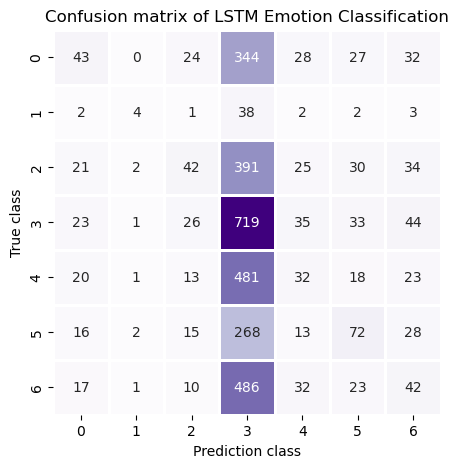

In [25]:
# LSTM Confusion matrix
lstm_cm = confusion_matrix(y_test, lstm_predictions)
#Transform to df for easier plotting
lstm_cm_df = pd.DataFrame(lstm_cm, index = label_map, columns = label_map)

plt.figure(figsize = (5,5))
sns.heatmap(lstm_cm_df, annot = True,cmap='Purples',cbar=False,linewidth=2,fmt='d')
plt.title('Confusion matrix of LSTM Emotion Classification')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [26]:
# LSTM accuracy and fmeasure
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
lstm_f1 = f1_score(y_test, lstm_predictions, average='weighted')

<h4><b>KNN Model</b></h4>

In [27]:
# Confusion matrics report
print(classification_report(y_test, cnn_predictions, labels=[0,1,2,3,4,5,6], target_names=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']))

              precision    recall  f1-score   support

       Angry       0.40      0.38      0.39       498
     Disgust       0.52      0.44      0.48        52
        Fear       0.41      0.37      0.39       545
       Happy       0.69      0.73      0.71       881
         Sad       0.40      0.40      0.40       588
   Surprised       0.70      0.60      0.65       414
     Neutral       0.44      0.50      0.47       611

    accuracy                           0.51      3589
   macro avg       0.51      0.49      0.50      3589
weighted avg       0.51      0.51      0.51      3589



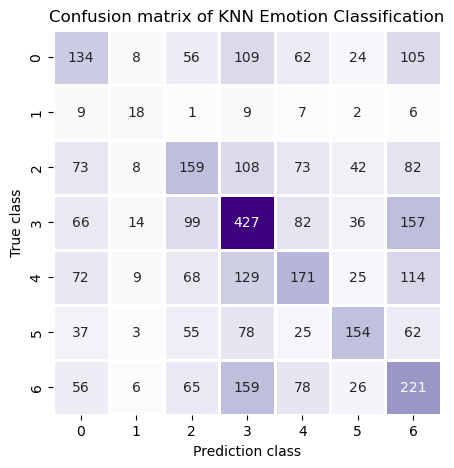

In [28]:
# KNN Confusion matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
#Transform to df for easier plotting
knn_cm_df = pd.DataFrame(knn_cm, index = label_map, columns = label_map)

plt.figure(figsize = (5,5))
sns.heatmap(knn_cm_df, annot = True,cmap='Purples',cbar=False,linewidth=2,fmt='d')
plt.title('Confusion matrix of KNN Emotion Classification')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [29]:
# KNN accuracy and fmeasure
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')

<h3>Result Summary</h3>

In [30]:
# Print performance metrics
print('CNN MODEL')
print('===========================================================')
print("Accuracy: {:.4f}".format(cnn_accuracy))
print('-----------------------------------------------------------')
print("F1-Score: {:.4f}".format(cnn_f1))
print('-----------------------------------------------------------')
print("Training Time: {:.4f} s".format(cnn_training_time))
print('-----------------------------------------------------------')
print("Prediction Time: {:.4f} s".format(cnn_pred_time))
print('-----------------------------------------------------------\n')

print('LSTM MODEL')
print('===========================================================')
print("Accuracy: {:.4f}".format(lstm_accuracy))
print('-----------------------------------------------------------')
print("F1-Score: {:.4f}".format(lstm_f1))
print('-----------------------------------------------------------')
print("Training Time: {:.4f} s".format(lstm_training_time))
print('-----------------------------------------------------------')
print("Prediction Time: {:.4f} s".format(lstm_pred_time))
print('-----------------------------------------------------------\n')

print('KNN MODEL')
print('===========================================================')
print("Accuracy: {:.4f}".format(knn_accuracy))
print('-----------------------------------------------------------')
print("F1-Score: {:.4f}".format(knn_f1))
print('-----------------------------------------------------------')
print("Training Time: {:.4f} s".format(knn_training_time))
print('-----------------------------------------------------------')
print("Prediction Time: {:.4f} s".format(cnn_pred_time))
print('-----------------------------------------------------------')

CNN MODEL
Accuracy: 0.5143
-----------------------------------------------------------
F1-Score: 0.5136
-----------------------------------------------------------
Training Time: 1979.0461 s
-----------------------------------------------------------
Prediction Time: 2.0584 s
-----------------------------------------------------------

LSTM MODEL
Accuracy: 0.2658
-----------------------------------------------------------
F1-Score: 0.1954
-----------------------------------------------------------
Training Time: 2560.6648 s
-----------------------------------------------------------
Prediction Time: 5.0005 s
-----------------------------------------------------------

KNN MODEL
Accuracy: 0.3578
-----------------------------------------------------------
F1-Score: 0.3563
-----------------------------------------------------------
Training Time: 0.0641 s
-----------------------------------------------------------
Prediction Time: 2.0584 s
-------------------------------------------------